# Análise de Curva de Luz de Exoplaneta (K2SFF - Campanha 13)

Este notebook tem como objetivo realizar uma análise exploratória de uma curva de luz do telescópio Kepler/K2, obtida através do projeto K2SFF (K2 Self Flat-Fielding). O experimento foca na detecção e caracterização preliminar de eventos de trânsito de exoplanetas.

## 🪐 Planeta e Estrela

### 🌟 Estrela: EPIC 246 911 830 (também conhecida como K2‑260)

- **Tipo espectral**: F6V (anã amarela mais quente e maior que o Sol), com temperatura na superfície cerca de **6 370 K**  
  Referência: [astro.keele.ac.uk](https://www.astro.keele.ac.uk), [exoplanetkyoto.org](https://www.exoplanetkyoto.org), [arXiv](https://arxiv.org)

- **Massa** ≈ **1,39 M☉**, **Raio** ≈ **1,69 R☉**  
  Referência: [exoplanet.eu](https://exoplanet.eu), [exoplanetkyoto.org](https://www.exoplanetkyoto.org), [arXiv](https://arxiv.org)

- **Magnitude aparente**: ~12,7  
  Referência: [Oxford Academic](https://academic.oup.com), [exoplanetkyoto.org](https://www.exoplanetkyoto.org)

- **Distância**: aproximadamente **2 205 anos‑luz (676 pc)** da Terra  
  Referência: [Wikipédia](https://wikipedia.org), [exoplanetkyoto.org](https://www.exoplanetkyoto.org)

---

### 🪐 Planeta: EPIC 246 911 830 b (também chamado K2‑260 b)

- **Tipo**: *Hot Jupiter*, ou seja, um gigante gasoso próximo da estrela.

- **Período orbital**: ~**2,627 dias** (cerca de 63 horas)  
  Referência: [arXiv](https://arxiv.org), [Wikipédia](https://wikipedia.org)

- **Raio** ≈ **1,55 RJúpiter**, **Massa** ≈ **1,42 MJúpiter**  
  Referência: [Wikipédia](https://wikipedia.org), [arXiv](https://arxiv.org)

- Foi o **primeiro Hot Jupiter detectado na missão K2 com eclipse secundário visível**, usado para estimar a refletividade (**albedo geométrico** ≈ **0,2**)  
  Referência: [arXiv](https://arxiv.org), [Oxford Academic](https://academic.oup.com)


## Objetivos:
1.  **Carregamento de Dados:** Importar e inspecionar a curva de luz de um alvo específico da Campanha 13 do K2.
2.  **Processamento Inicial:** Preparar os dados para análise, identificando e isolando as mínimas de brilho causadas por trânsitos.
3.  **Caracterização de Trânsitos:** Calcular propriedades como o período do trânsito e a variação do fluxo durante o evento.
4.  **Estimativa do Raio Planetário:** Utilizar as informações da curva de luz para estimar o raio do exoplaneta em relação a Júpiter.

---

#### Baixar dados da Internet em CSV

In [15]:
# Nome do arquivo de saída
#=
filename = "k2_lightcurve.csv" # Salvando como .csv, mas é um arquivo de texto separado por espaço

# Faz a requisição HTTP e obtém o corpo da resposta
response_body = HTTP.get(url).body

# Abre o arquivo para escrita e salva o conteúdo
open(filename, "w") do io
    write(io, response_body)
end

println("Dados baixados e salvos como $(filename) no diretório atual.")

Base.Meta.ParseError: ParseError:
# Error @ c:\Users\eighi\OneDrive\Documentos\MyProjects\julia\jl.vscode\exoplanet\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_W2sZmlsZQ==.jl:2:1
# Nome do arquivo de saída
┌─
#=
filename = "k2_lightcurve.csv" # Salvando como .csv, mas é um arquivo de texto separado por espaço
⋮

println("Dados baixados e salvos como $(filename) no diretório atual.")
#─────────────────────────────────────────────────────────────────────┘ ── unterminated multi-line comment #= ... =#

In [16]:
using CSV
using DataFrames
using Statistics
using HTTP
using Plots
using Suppressor # para suprimir warnings
theme(:bright)

# URL do arquivo
url = "https://archive.stsci.edu/hlsps/k2sff/c13/246900000/11830/hlsp_k2sff_k2_lightcurve_246911830-c13_kepler_v1_llc-default-aper.txt"

# Ler o conteúdo da URL
response = HTTP.get(url).body

# Criar buffer
io = IOBuffer(response)

# Suprimir apenas os warnings da leitura do CSV
df = @suppress CSV.File(io; delim=' ', ignorerepeated=true, comment="#") |> DataFrame

# Visualizar as primeiras linhas
first(df, 5)


5×5 DataFrame
 Row │ BJD              -             2454833,  Corrected  Flux    
     │ String15         String15      Missing   Missing    Missing 
─────┼─────────────────────────────────────────────────────────────
   1 │ 2988.521553573,  1.000269873,   missing    missing  missing 
   2 │ 2988.541985872,  1.000284426,   missing    missing  missing 
   3 │ 2988.562418271,  0.999863433,   missing    missing  missing 
   4 │ 2988.582850768,  0.999381236,   missing    missing  missing 
   5 │ 2988.603283065,  0.999876455,   missing    missing  missing 

In [17]:
df = df[:, 1:2];

In [18]:
rename!(df, [:BJD_minus_2454833, :Corrected_Flux])

3605×2 DataFrame
  Row │ BJD_minus_2454833  Corrected_Flux 
      │ String15           String15       
──────┼───────────────────────────────────
    1 │ 2988.521553573,    1.000269873,
    2 │ 2988.541985872,    1.000284426,
    3 │ 2988.562418271,    0.999863433,
    4 │ 2988.582850768,    0.999381236,
    5 │ 2988.603283065,    0.999876455,
    6 │ 2988.623715462,    0.999004778,
    7 │ 2988.644147858,    0.999297837,
    8 │ 2988.664580253,    0.999004009,
  ⋮   │         ⋮                ⋮
 3599 │ 3068.001217234,    1.014532690,
 3600 │ 3068.021649106,    1.014475838,
 3601 │ 3068.042080779,    1.014412902,
 3602 │ 3068.062512551,    1.014367713,
 3603 │ 3068.082944424,    1.014312040,
 3604 │ 3068.103376097,    1.014292636,
 3605 │ 3068.123807771,    1.014261689,
                         3590 rows omitted

In [19]:
df[!, "BJD_minus_2454833"] = parse.(Float64, replace.(df[!, "BJD_minus_2454833"], "," => ""))
df[!, "Corrected_Flux"] = parse.(Float64, replace.(df[!, "Corrected_Flux"], "," => ""))

3605-element Vector{Float64}:
 1.000269873
 1.000284426
 0.999863433
 0.999381236
 0.999876455
 0.999004778
 0.999297837
 0.999004009
 0.998879109
 0.99864503
 ⋮
 1.014345678
 1.014340386
 1.01453269
 1.014475838
 1.014412902
 1.014367713
 1.01431204
 1.014292636
 1.014261689

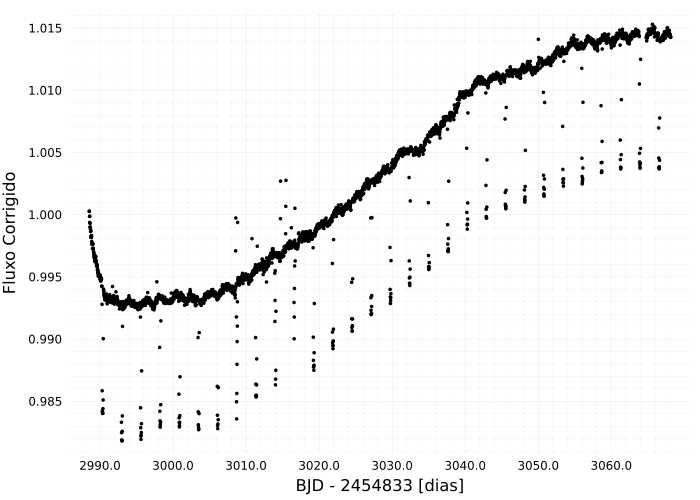

In [20]:
# Extrair colunas como vetores
t1 = df[!, "BJD_minus_2454833"]  # tempo em dias
f1 = df[!, "Corrected_Flux"]  # fluxo corrigido

xmin = floor(minimum(t1)/10)*10
xmax = ceil(maximum(t1)/10)*10

ticks = collect(xmin:10:xmax)
ticks_in_range = filter(x -> x >= minimum(t1) && x <= maximum(t1), ticks)

scatter(t1, f1,
    color = :black,
    markersize = 2,
    label = "",
    xlabel = "BJD - 2454833 [dias]",
    ylabel = "Fluxo Corrigido",
    size = (700, 500),
    xticks = (ticks_in_range, string.(ticks_in_range))
)

##### Para ser ter evidência de que se trata de um Exoplaneta, precisa ter no mínimo `(3) três trânsitos planetários`, cada queda dos pontos é um trânsito planetário, nesse caso, confirma-se que é de fato um Exoplaneta.

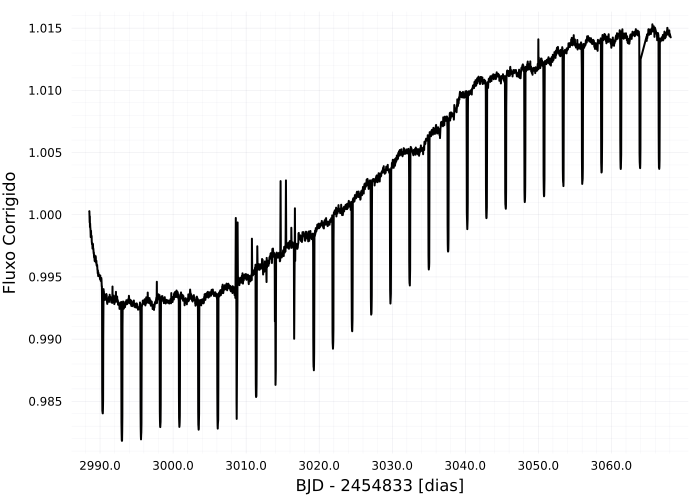

In [21]:
plot(t1, f1,
    color = :black,
    linewidth = 2,
    label = "",
    xlabel = "BJD - 2454833 [dias]",
    ylabel = "Fluxo Corrigido",
    size = (700, 500),
    xticks = (ticks_in_range, string.(ticks_in_range))
)

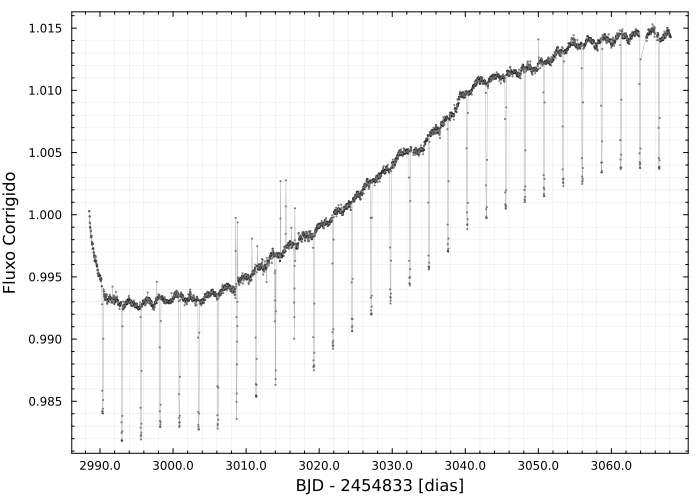

In [33]:
plot(t1, f1,
    seriestype = :scatter,
    color = :black,
    markersize = 1.2,
    alpha = 0.5,
    label = "",
    xlabel = "BJD - 2454833 [dias]",
    ylabel = "Fluxo Corrigido",
    size = (700, 500),
    xticks = (ticks_in_range, string.(ticks_in_range)),
    legend = false,
    grid = false,
    framestyle = :box
)

plot!(t1, f1, lw = 0.3, color = :gray, label = "")

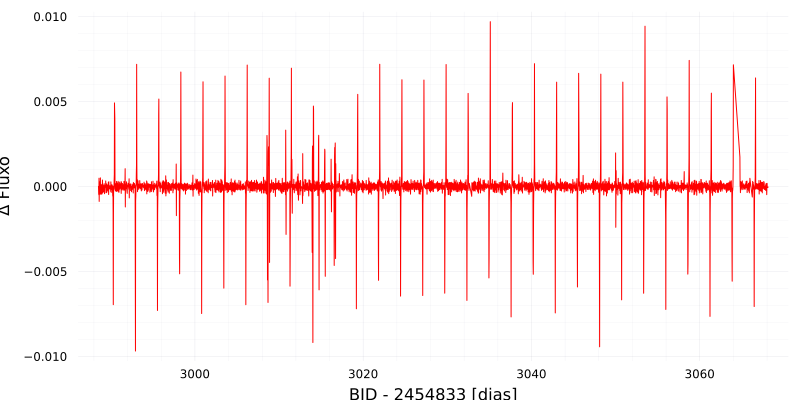

In [32]:
dflux = diff(f1)

plot(t1[2:end], dflux,
    color = :red,
    lw = 1,
    xlabel = "BJD - 2454833 [dias]",
    ylabel = "Δ Fluxo",
    legend = false,
    size = (800, 400)
)


##### Foram contabilizados 30 trânsitos planetários, ou queda de luz.

In [22]:
println("Valor final: ", t1[end])
println("Valor inicial: ", t1[1])
println("Dividido por 30 (número de trânsitos) resulta no período:")
println("O planeta gira em torno da sua estrela a cada ", round((t1[end] - t1[1]) / 30, digits=2), " dias.")

Valor final: 3068.123807771
Valor inicial: 2988.521553573
Dividido por 30 (número de trânsitos) resulta no período:
O planeta gira em torno da sua estrela a cada 2.65 dias.


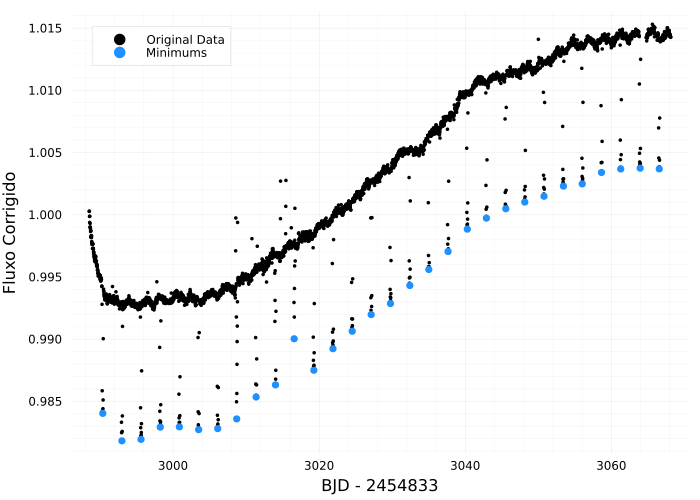

In [23]:
count_val = 0
min_idx = zeros(Int, 30) # Pre-allocate vector for minimum positions. Use Int for indices.
interval = floor(Int, length(f1)/30) + 1 # Use floor(Int, ...) for integer division

for i in 1:length(min_idx)
    start_idx = count_val + 1
    end_idx = min(count_val + interval, length(f1)) # Ensure end_idx doesn't exceed length(f1)
    
    if start_idx <= end_idx
        min_val_idx_in_slice = argmin(f1[start_idx:end_idx])
        min_idx[i] = start_idx + min_val_idx_in_slice - 1 # Convert slice index to original index
    else

        break 
    end
    count_val += interval
end
# Ensure min_idx contains valid indices before using them
min_idx = min_idx[min_idx .!= 0] # Remove any zero entries if not all 30 were filled

# If 'data' is a simple matrix, you'd access it like data[min_idx, 1]
t1_min = df[min_idx, 1] # Accessing the first column (index 1)
f1_min = df[min_idx, 2] # Accessing the second column (index 2)

# Plotting using Plots.jl
plot(size = (700, 500)) # Equivalent to figsize=(10,8) in matplotlib, but in pixels

plot!(df[:, 1], df[:, 2], seriestype = :scatter, color = :black, markersize = 2, label = "Original Data")

# Scatter plot of the minimums (equivalent to the second plt.scatter)
plot!(t1_min, f1_min, seriestype = :scatter, color = :dodgerblue, markersize = 4, label = "Minimums")

xlabel!("BJD - 2454833")
ylabel!("Fluxo Corrigido")
display(current()) # Display the plot

In [24]:
# Calculate the length of the 'periods' array
num_periods = length(min_idx) - 1
# Pre-allocate the 'periods' vector
periods = zeros(Float64, num_periods) # Use Float64 as the result of subtraction will likely be float
# Loop to calculate periods
# So, the loop will go from 1 to num_periods.
for i in 1:num_periods
    # data.iloc[int(min_idx[i+1]), 0] - data.iloc[int(min_idx[i]), 0]
    # Remember min_idx stores 1-based indices from the previous step.
    # In Julia, data[row_index, column_index] accesses DataFrame elements.
    # We are accessing the first column (index 1).
    periods[i] = df[min_idx[i+1], 1] - df[min_idx[i], 1]
end
# Calculate and print the mean of the periods
println("Apurando ainda a estimativa do valor real com a média de cada mínima: $(mean(periods)) dias, ou seja, esse é o período orbital do planeta.")

Apurando ainda a estimativa do valor real com a média de cada mínima: 2.6265400756206905 dias, ou seja, esse é o período orbital do planeta.


Calculando o Raio do Planeta, com base no Raio de sua Estrela

### $$ \frac{R_p}{R_*} = \sqrt{f_{cont} - f_{min}} $$

In [25]:
# Calcula o número de elementos para o vetor 'diff'
# len(min_idx) - 1 em Python corresponde a length(min_idx) - 1 em Julia.
num_diff_elements = length(min_idx) - 1
# Pré-aloca o vetor 'diff'
diff_vals = zeros(Float64, num_diff_elements) # Usamos 'Float64' pois as subtrações resultarão em floats.
# Loop para calcular as diferenças
# range(len(min_idx)-1) em Python significa de 0 até len(min_idx)-2 (inclusive).
# Em Julia, usamos indexação baseada em 1.
# Então, o loop vai de 1 até num_diff_elements.
for i in 1:num_diff_elements
    # f1[int(min_idx[i+1])-10] - f1[int(min_idx[i])]
    # Lembre-se que min_idx guarda índices baseados em 1 do passo anterior.
    # Em Julia, os índices de array são verificados em tempo de execução.
    # É crucial garantir que (min_idx[i+1]-10) e min_idx[i] sejam índices válidos para 'f1'.
    
    # Para garantir que os índices não sejam menores que 1 (início do array)
    # ou maiores que length(f1) (fim do array), adicionamos min e max.
    idx_f1_i_plus_1 = max(1, min(length(f1), min_idx[i+1] - 10))
    idx_f1_i = max(1, min(length(f1), min_idx[i])) # Embora min_idx[i] já deva ser válido se f1 é bem definido.

    diff_vals[i] = f1[idx_f1_i_plus_1] - f1[idx_f1_i]
end

# Calcula e imprime a média das diferenças
println("Média das diferenças: $(mean(diff_vals))")

Média das diferenças: 0.011202861344827562


A equação calcula o raio de um planeta ($R_p$) em raios de Júpiter ($R_J$).

### $$R_p [R_J] = \frac{R_{Sol}}{R_J} \cdot \frac{R_*}{R_{Sol}} \sqrt{f_{cont} - f_{min} [R_J]}$$

* **$R_p [R_J]$:** Raio do planeta em unidades do raio de Júpiter.
* **$R_{Sol}$:** Raio do Sol. Aprox. 695.700 km.
* **$R_J$:** Raio de Júpiter. Aprox. 71.492 km.
* **$R_*$:** Raio da estrela hospedeira.
* **$f_{cont}$:** Fluxo (brilho) da estrela sem trânsito.
* **$f_{min}$:** Fluxo mínimo da estrela durante o trânsito do planeta.

**Em resumo:** A fórmula usa a relação de tamanho entre Sol e Júpiter, a relação de tamanho entre a estrela e o Sol, e a queda de brilho da estrela durante o trânsito (indicando o tamanho relativo do planeta à estrela) para determinar o tamanho do planeta em unidades de Júpiter.

In [26]:
result = (695700 / 71492) * 1.69 * sqrt(mean(diff_vals))
println("O resultado da expressão é: $(result) ou seja, esse planeta é $(round(result, digits=2)) vezes maior que Júpiter")

O resultado da expressão é: 1.740667183437733 ou seja, esse planeta é 1.74 vezes maior que Júpiter


  Referência: [1](https://www.youtube.com/watch?v=lgnQdQmB_3o&list=PLgGmq5CrIhxY5j7TXVrIT2RotMdSiO5gN&index=7)